### PROJECT OBJECTIVE- To find out whether a client will subscribe(yes/no) to a term deposit in a bank 
#### THEME - CLASSIFICATION 
#### NAME- PRATYKSHA GUPTA



##### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Loading and Preparing the dataset

In [2]:
#Load the dataframe 
df= pd.read_csv(r"C:\Users\HP\Downloads\bank-full.csv\bank-full.csv",sep=';',na_values='None')
df.head(50)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.drop('contact', axis=1)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0,unknown,no


In [6]:
# Step 2: Drop customer values with 'other' education
col = (df['education'] == 'unknown')
df.drop(df[col].index, axis = 0, inplace = False)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Exploratory Data Analysis

#### Checking numeric and categorical features

In [7]:

# IDENTIFYING NUMERICAL FEATURES

numeric_data = df.select_dtypes(include=np.number) # select_dtypes selects data with numeric features
numeric_col = numeric_data.columns                                                                # we will store the numeric features in a variable

print("Numeric Features:")
print(numeric_data.head())


Numeric Features:
   age  balance  day  duration  campaign  pdays  previous
0   58     2143    5       261         1     -1         0
1   44       29    5       151         1     -1         0
2   33        2    5        76         1     -1         0
3   47     1506    5        92         1     -1         0
4   33        1    5       198         1     -1         0


In [8]:

# IDENTIFYING CATEGORICAL FEATURES
categorical_data = df.select_dtypes(exclude=np.number) # we will exclude data with numeric features
categorical_col = categorical_data.columns # we will store the categorical features in a variable


print("Categorical Features:")
print(categorical_data.head())

Categorical Features:
            job  marital  education default housing loan  contact month  \
0    management  married   tertiary      no     yes   no  unknown   may   
1    technician   single  secondary      no     yes   no  unknown   may   
2  entrepreneur  married  secondary      no     yes  yes  unknown   may   
3   blue-collar  married    unknown      no     yes   no  unknown   may   
4       unknown   single    unknown      no      no   no  unknown   may   

  poutcome   y  
0  unknown  no  
1  unknown  no  
2  unknown  no  
3  unknown  no  
4  unknown  no  


In [9]:
df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
#checking for class imbalance 
# we are finding the percentage of each class in the feature 'y'
class_values = (df['y'].value_counts()/df['y'].value_counts().sum())*100
print(class_values)

no     88.30152
yes    11.69848
Name: y, dtype: float64


#### Observation


The class distribution in the target is 88:11. This is a clear indication of imbalance.


#### Detection of Outliers

In [11]:
cols = list(df) # A List of all features

outliers = pd.DataFrame(columns=['Feature','Number of Outliers']) # Creating a new dataframe to

for column in numeric_col: # Iterating thorough each feature            
            # first quartile (Q1)
        q1 = df[column].quantile(0.25) 
            
            # third quartile (Q3)
        q3 = df[column].quantile(0.75)
            
            # IQR
        iqr = q3 - q1
            # 
        fence_low = q1 - (1.5*iqr)
        
        fence_high = q3 + (1.5*iqr)
            # finding the number of outliers using or condition
        total_outlier = df[(df[column] < fence_low) | (df[column] > fence_high)].shape[0]
        
        outliers = outliers.append({'Feature':column,'Number of Outliers':total_outlier},ignore_index=True)
outliers

,Feature,Number of Outliers
0,age,487
1,balance,4729
2,day,0
3,duration,3235
4,campaign,3064
5,pdays,8257
6,previous,8257


Observations :
- As per the IQR methodology, there are outliers in majority of the columns.
- In the further steps below, we will see how to deal with the outliers.

#### OUTLIER VISUALISATION

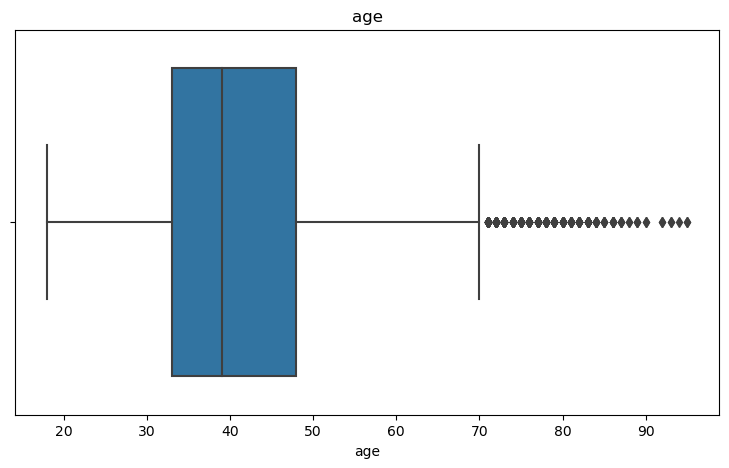

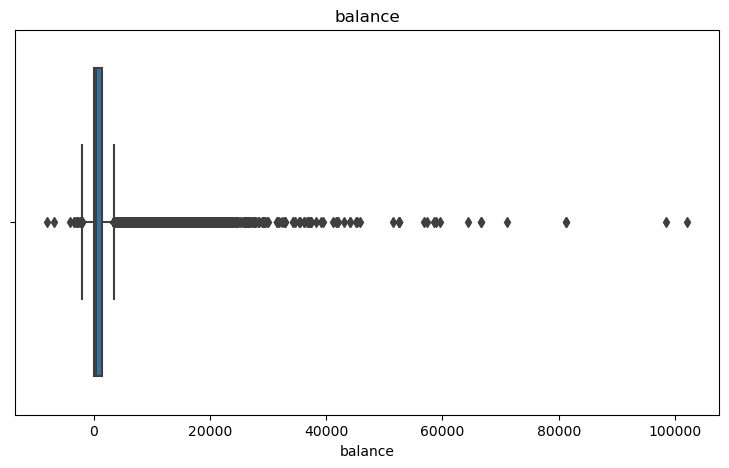

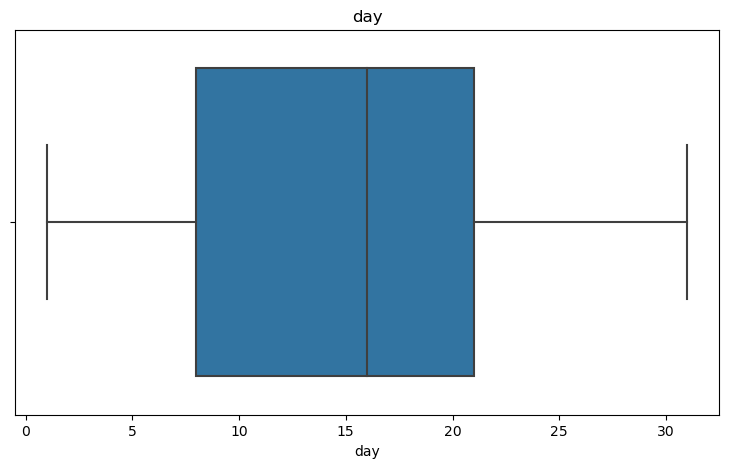

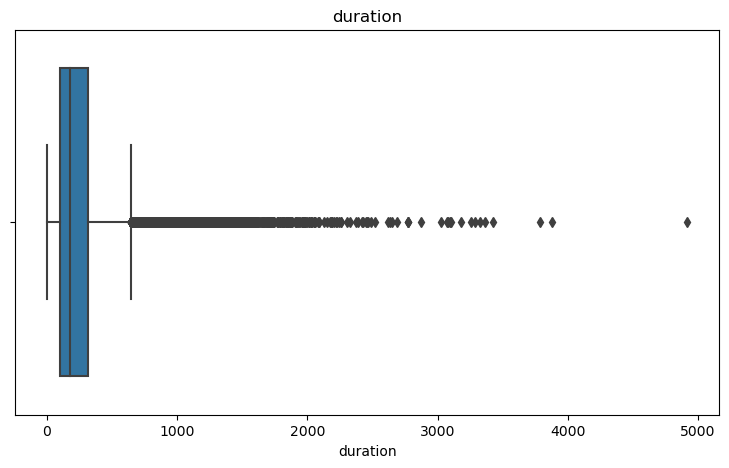

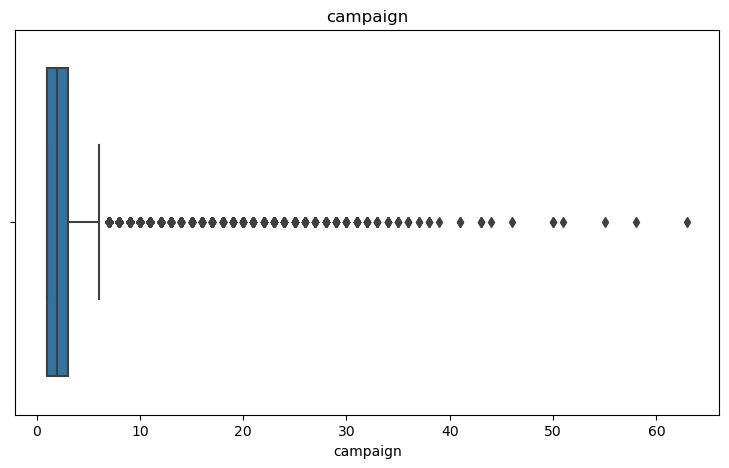

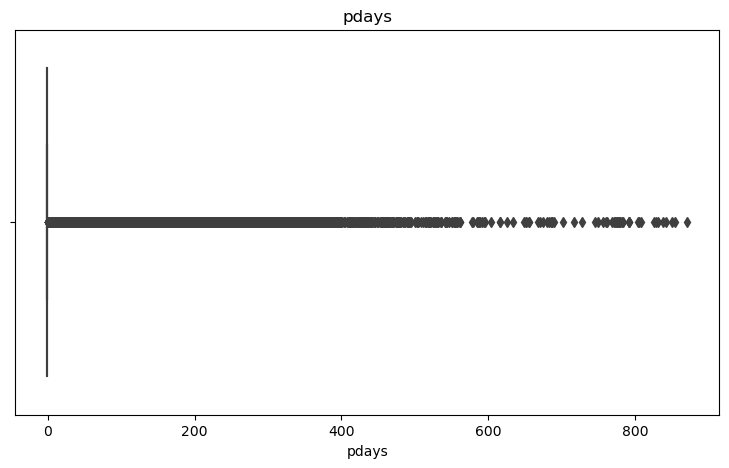

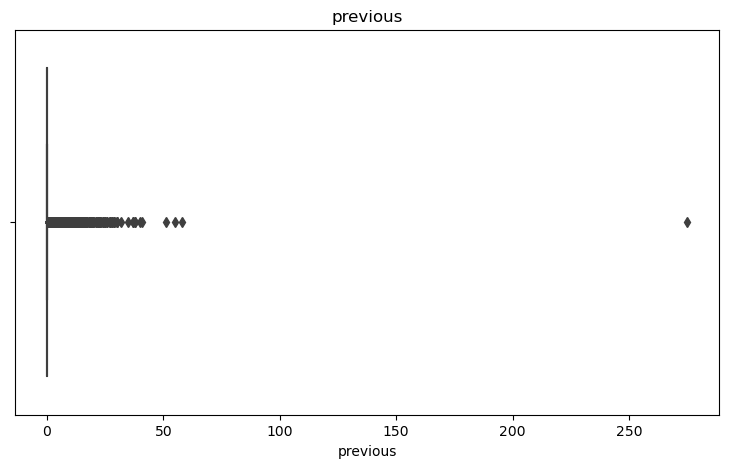

In [12]:
for column in numeric_col:
    plt.figure(figsize=(20,5))
    plt.subplot(122)
    sns.boxplot(df[column])
    plt.title(column)

#### Analysis on Categorical Columns

- plotting bar charts for each specific column

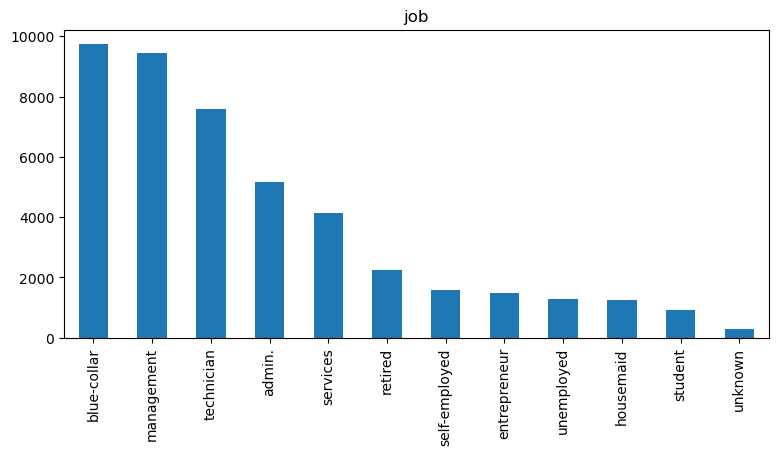

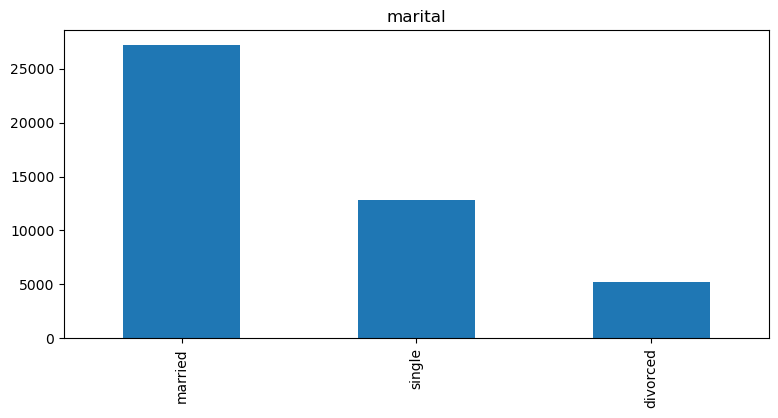

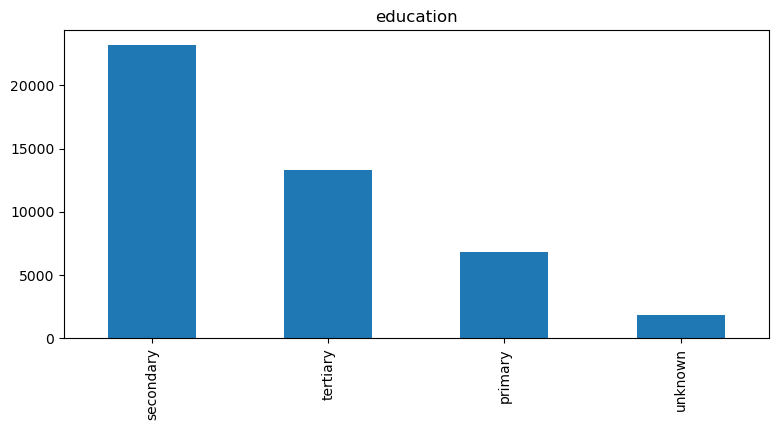

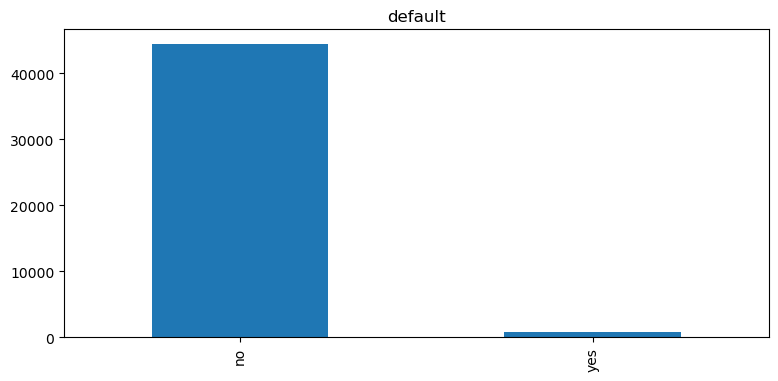

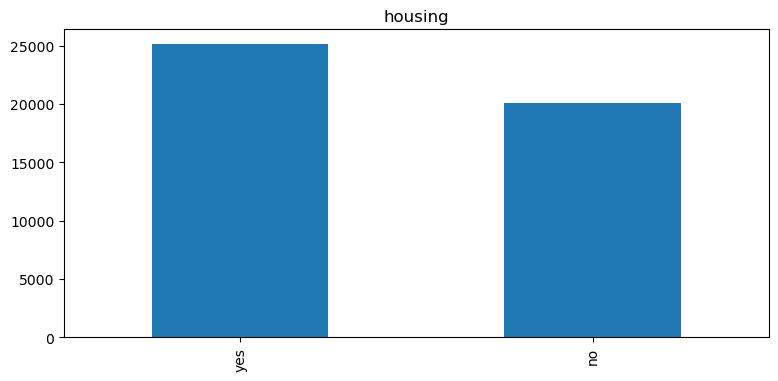

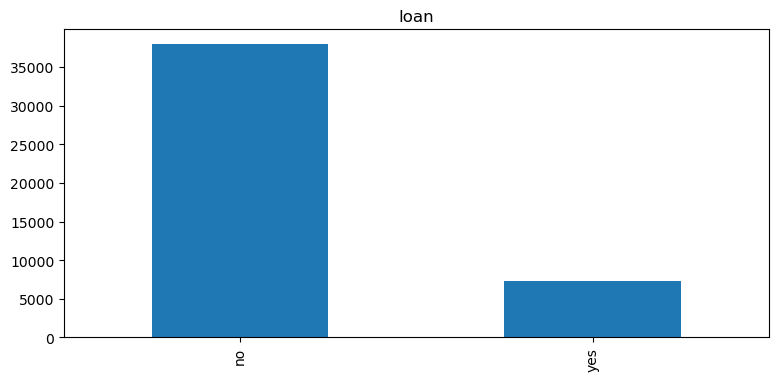

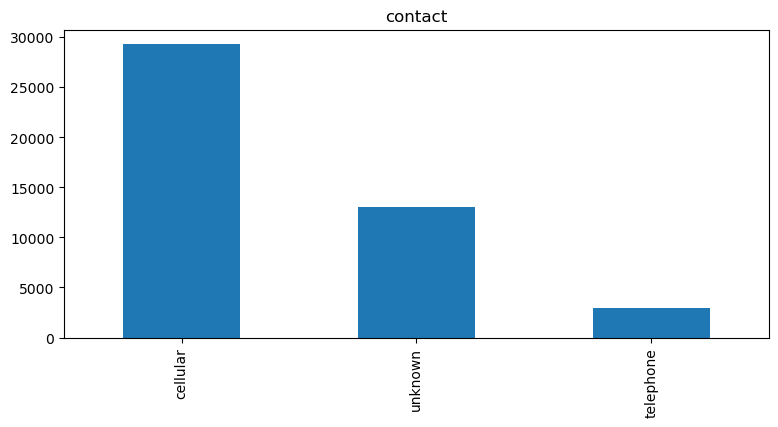

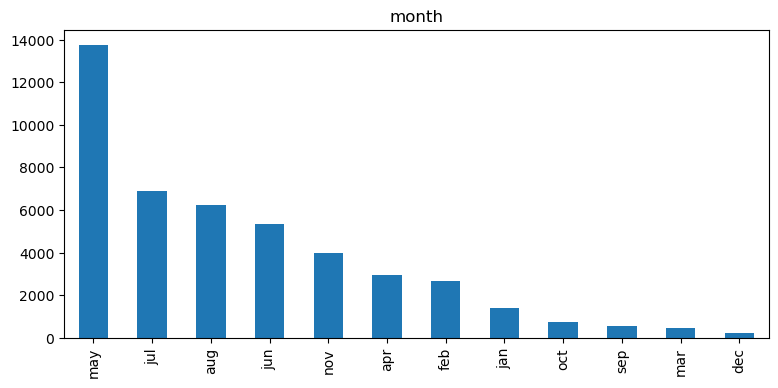

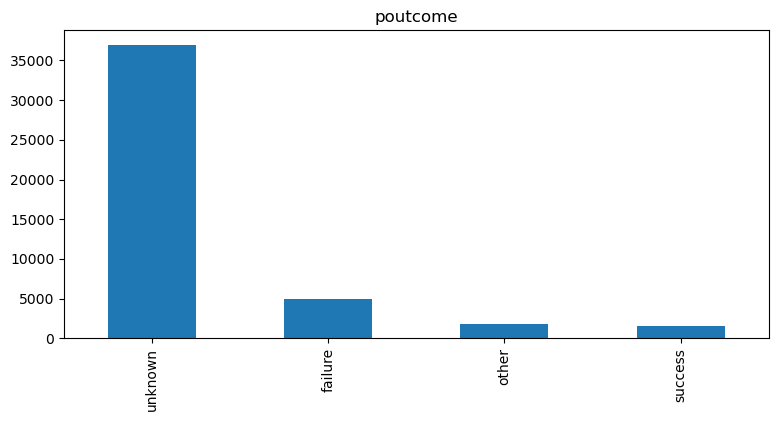

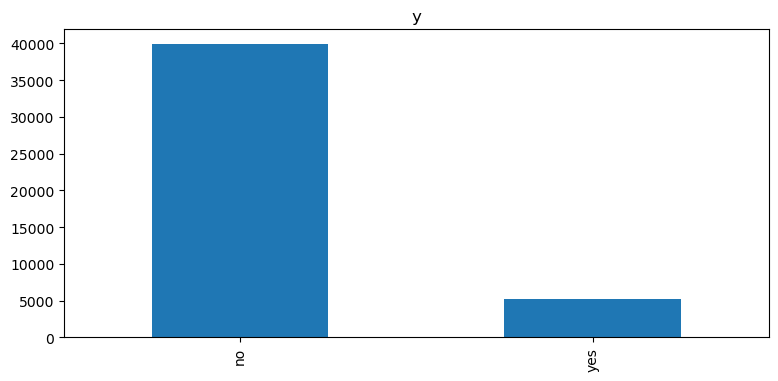

In [13]:
# Selecting the categorical columns
categorical_col = df.select_dtypes(include=['object']).columns

# Plotting a bar chart for each of the cateorical variable
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df[column].value_counts().plot(kind='bar')
    plt.title(column)

Observations
- the top5 professions are admin, blue-collar, technician, services, management
- most of the customers are married 
- customers having a university degree are high
- most of the customers do not have a default credit history 
- a similar number of people have applied for housing loan and not applied 
- most of the customers have been contacted in may 
- there seem to be some missing values labelled as unknown in lot of the numeric columns

In [14]:
for col in categorical_col:
    mode= df[col].mode()[0]
    df[col]= df[col].replace('unknown', mode)

In [15]:
# Checking for missing values after imputation
missing_values = df.isnull().sum()

print("Number of missing values in each categorical column:")
print(missing_values)

Number of missing values in each categorical column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


#### Analysis of Continuous Columns

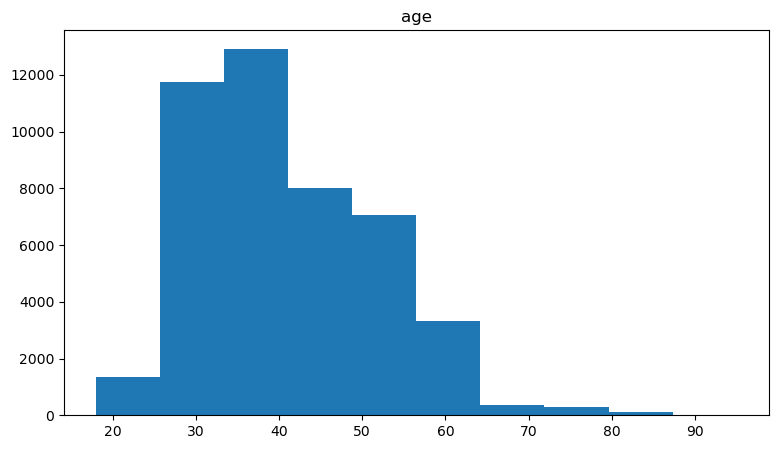

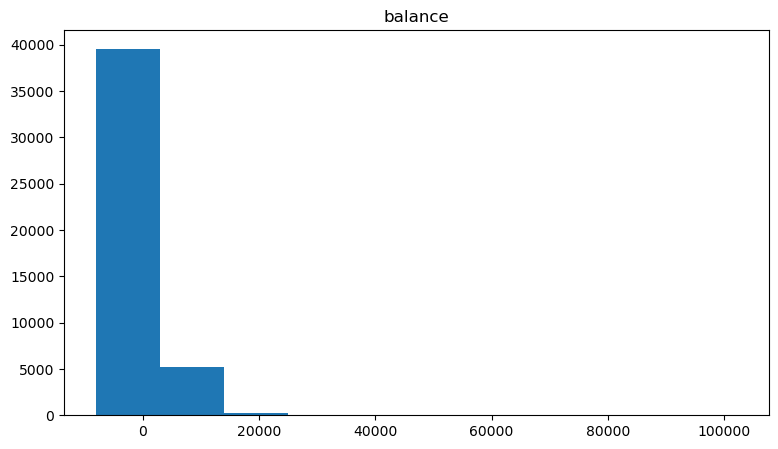

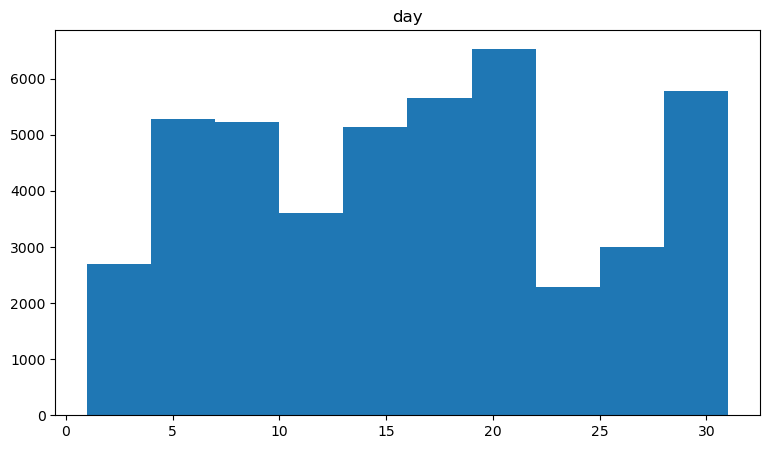

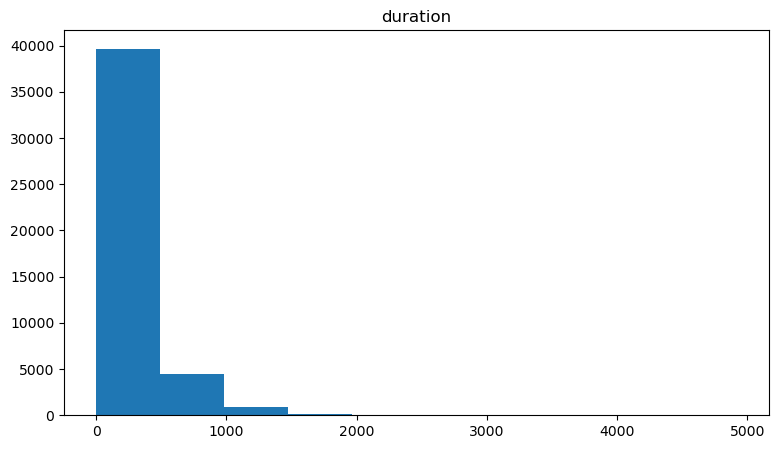

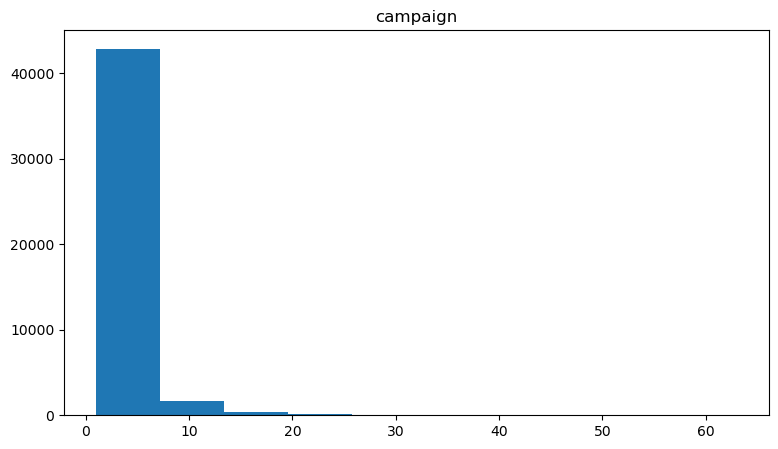

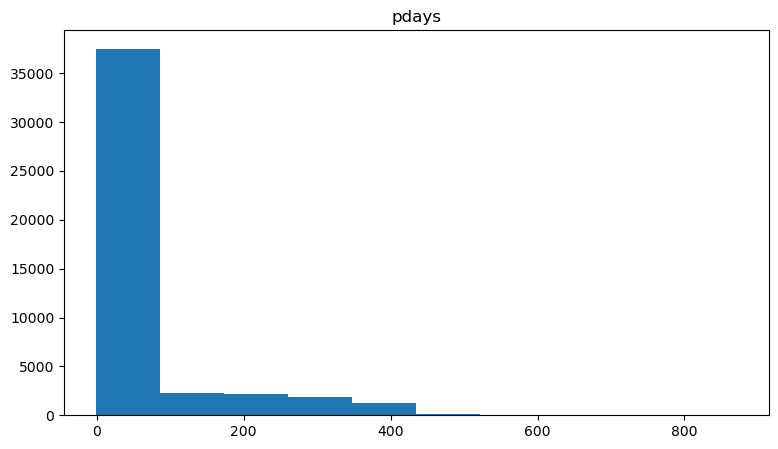

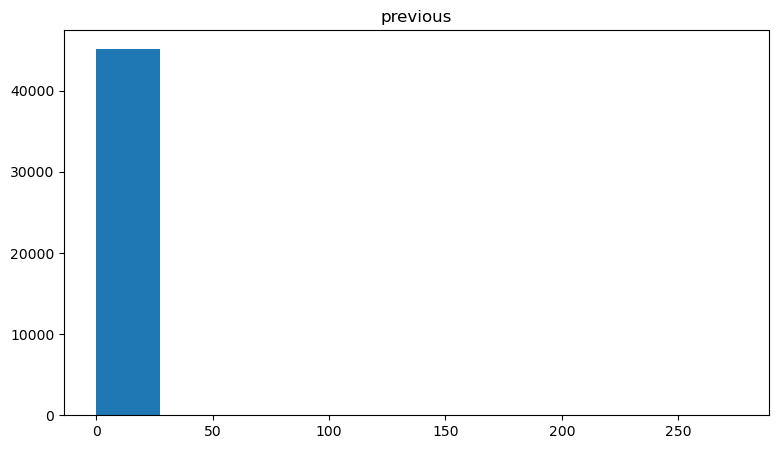

In [16]:
for column in numeric_col:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    plt.hist(df[column])
    plt.title(column)

Observations
- the age group of people lie in 30-50 range with mean being at 35. alot of outliers seem to be present in the age column
- age, duration and campaign,previous is heavily skewed and also contain alot of outliers 


#### BiVariate analysis

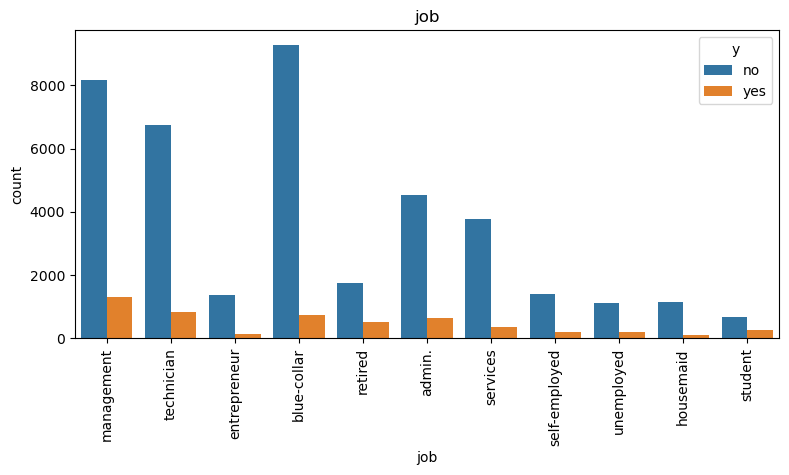

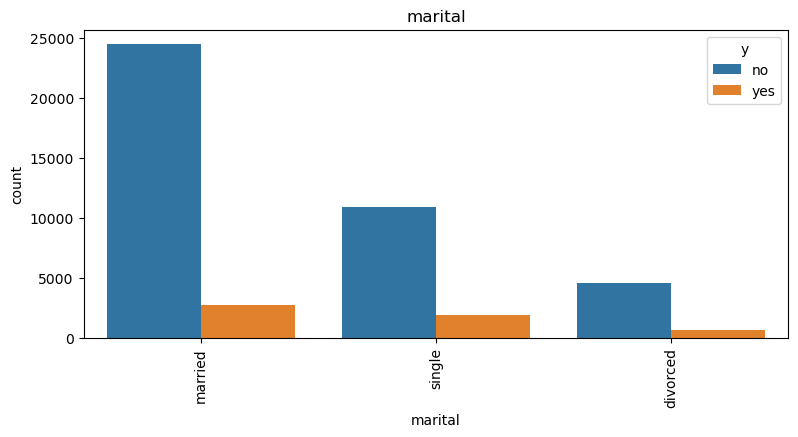

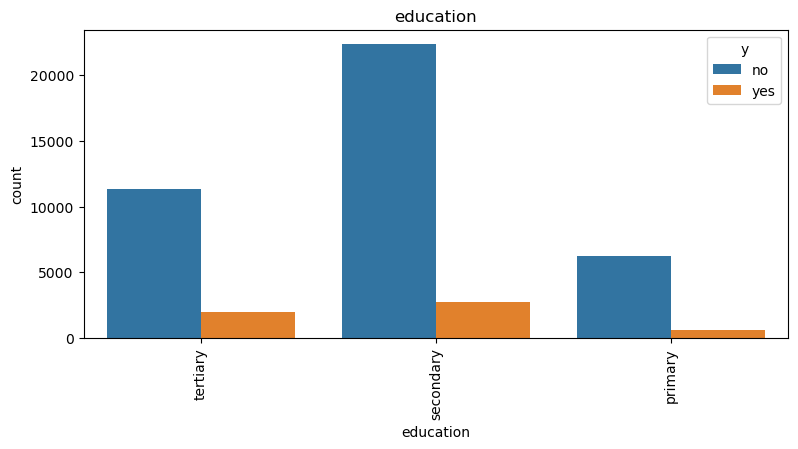

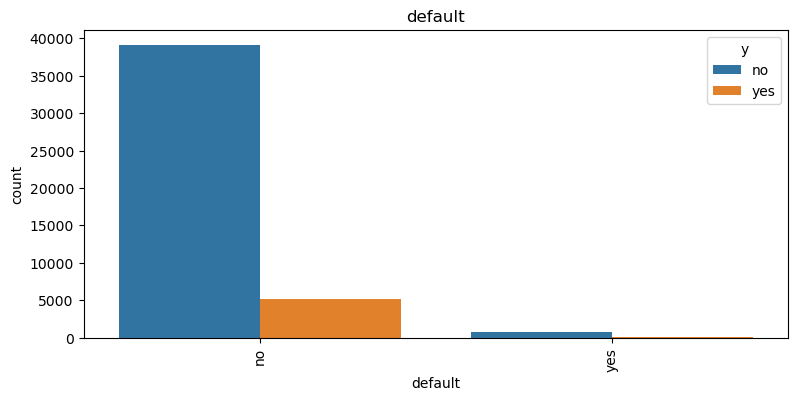

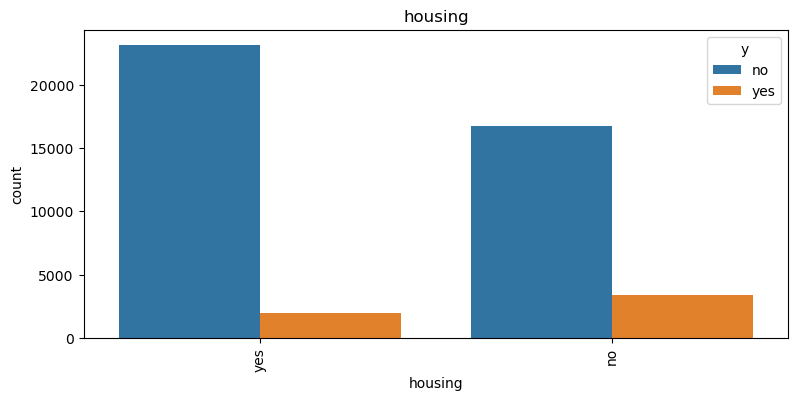

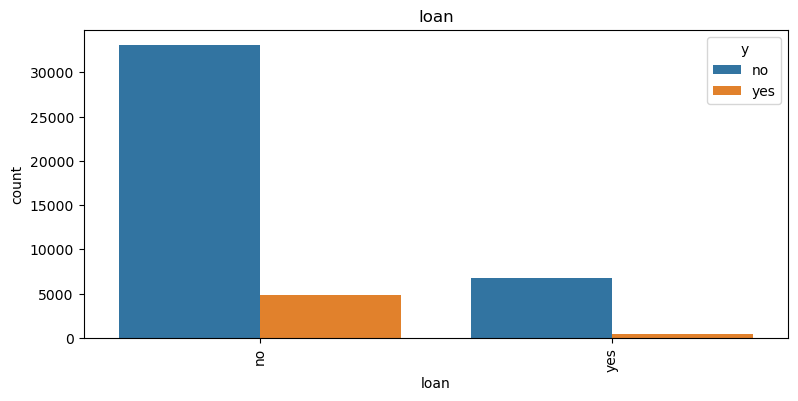

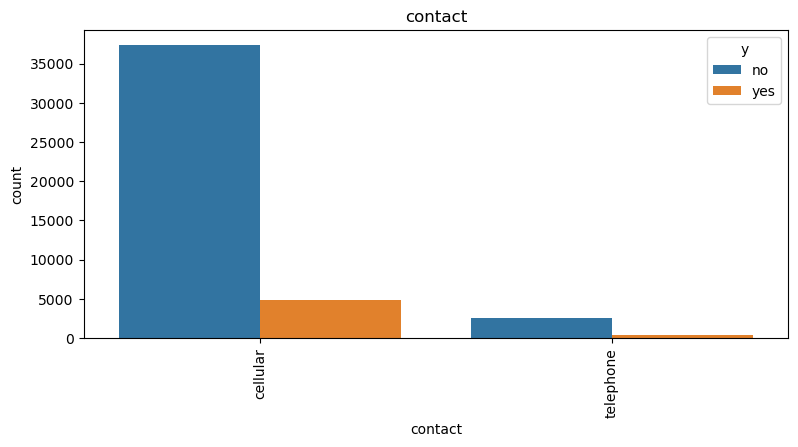

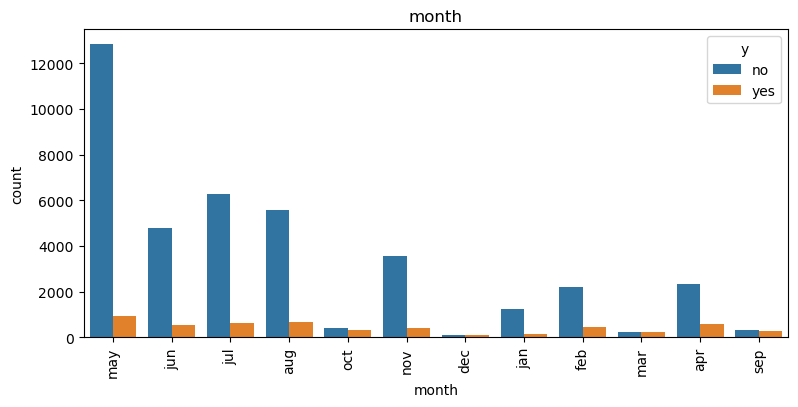

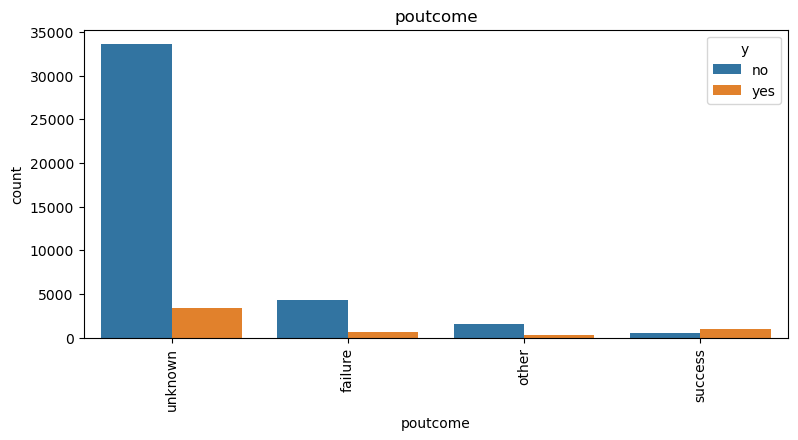

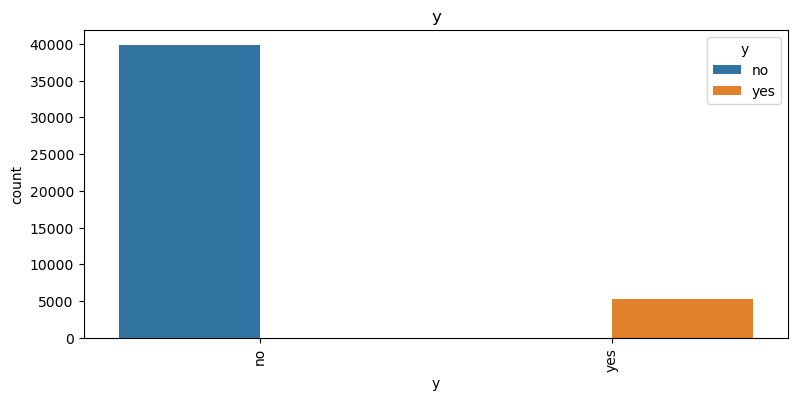

In [17]:
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=df[column],hue=df['y'],data=df)
    plt.title(column)    
    plt.xticks(rotation=90)

Observations

The common traits seen for customers who have subscribed for the term deposit are :
- They are either married or single
- They hold a university degree
- No credit default history 
- Housing loan doesn't seem a priority to check for since an equal number of customers who have and have not subscribed to it seem to have subscribed to the term deposit.
- Cell-phones should be the preferred mode of contact for contacting customers.

#### RELATIONSHIP WITH DURATION AND CAMPAIGN 

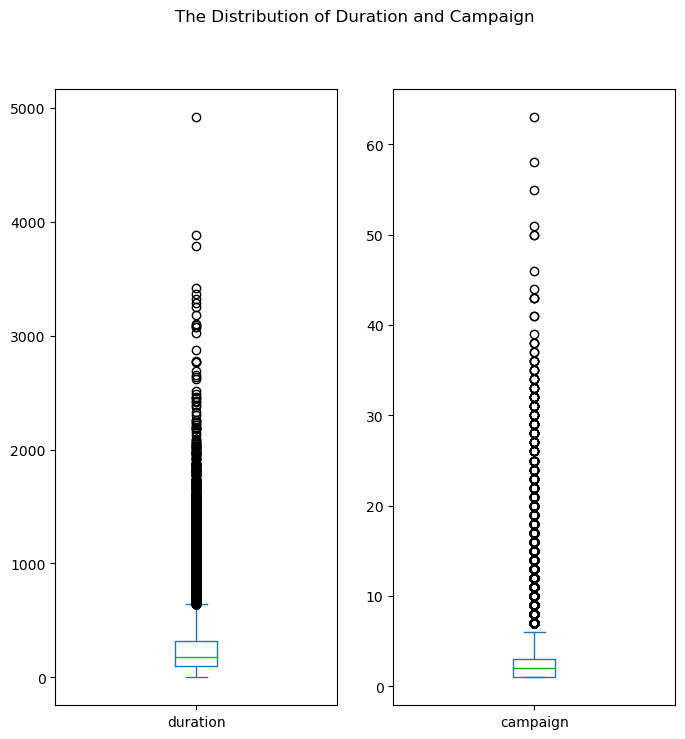

In [18]:
dist_dur_cam = df[['duration','campaign']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()

#### RELATIONSHIP BETWEEN RESPONSE AND AGE GROUP

In [19]:
def age_group(age):
    if age<31:
        return 'young'
    elif age<51:
        return 'middle'
    else:
        return 'senior'

In [20]:
df['age_group']=df['age'].map(age_group)

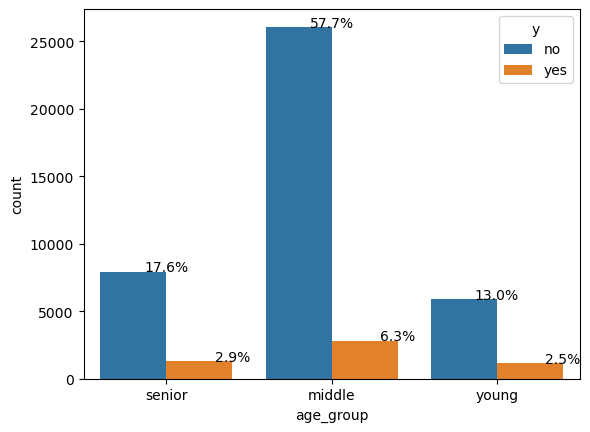

In [21]:
ax=sns.countplot(data=df,x='age_group',hue='y')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

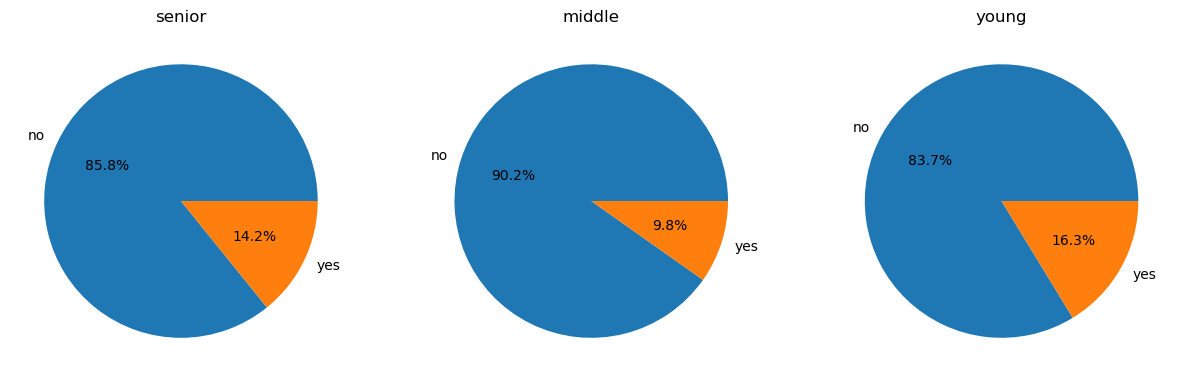

In [22]:
#creating subplots of unique age categories 
fig,ax=plt.subplots(1,df['age_group'].nunique(),figsize=(15,20))
#iterating thru each age groupb
for i,col in enumerate(df['age_group'].unique()):
    ax[i].pie(x=df[df['age_group']==col]['y'].value_counts(),
              labels=df[df['age_group']==col]['y'].value_counts().index,autopct='%1.1f%%')
    ax[i].set_title(col)

Conclusion
- seniors(>50) and youngsters(<31) are likely to respond more and might be affected by the campaign but are contacted the least 

#### RELATIONSHIP BETWEEN RESPONSE AND MARITAL STATUS

In [23]:
df['marital']

0         married
1          single
2         married
3         married
4          single
           ...   
45206     married
45207    divorced
45208     married
45209     married
45210     married
Name: marital, Length: 45211, dtype: object

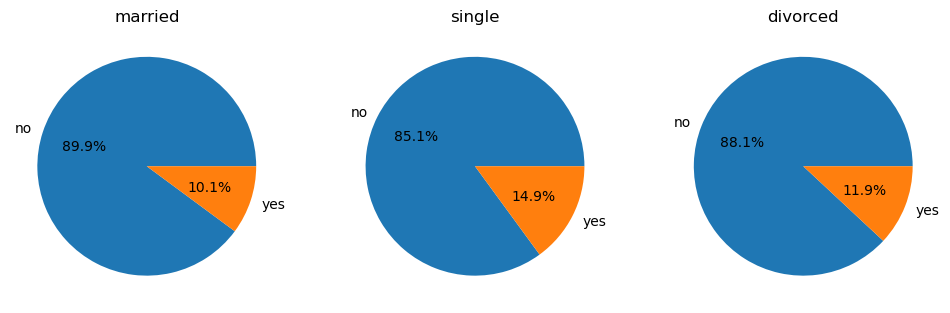

In [24]:
fig,ax=plt.subplots(1,df['marital'].nunique(),figsize=(12,8))
for i,col in enumerate(df['marital'].unique()):
    ax[i].pie(x=df[df['marital']==col]['y'].value_counts(),
              labels=df[df['marital']==col]['y'].value_counts().index,autopct='%1.1f%%')
    ax[i].set_title(col)

single people have a better response to the campaign more than married and divorced 

#### RELATIONSHIP OF RESPONSE WITH CREDIT HISTORY

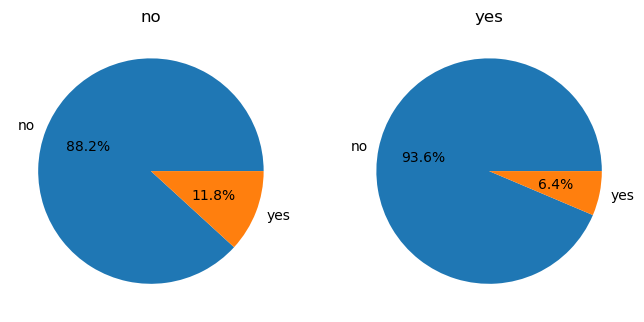

In [25]:
fig,ax=plt.subplots(1,df['default'].nunique(),figsize=(8,6))
for i,col in enumerate(df['default'].unique()):
    ax[i].pie(x=df[df['default']==col]['y'].value_counts(),
              labels=df[df['default']==col]['y'].value_counts().index,autopct='%1.1f%%')
    ax[i].set_title(col)

#### RELATIONSHIP BETWEEN JOB AND RESPONSE 

In [26]:
count_job_response_pct = pd.crosstab(df['y'],df['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()

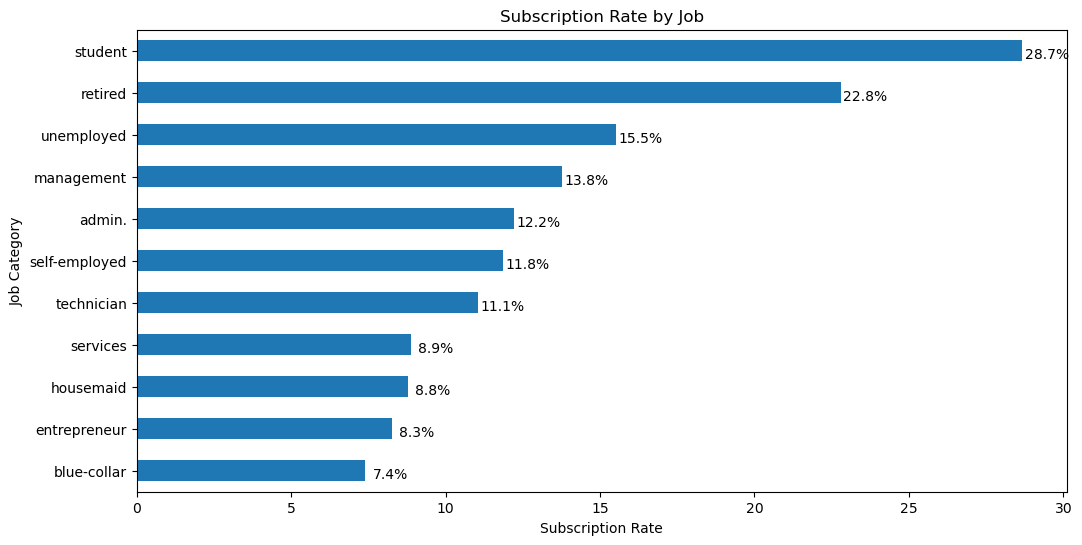

In [27]:
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

As discussed above also , student and retired people seem to be the target audience for people subscribing to the deposit 
and the marekting campaigns shld be focussed on them 

#### RELATIONSHIP OF RESPONSE WITH LAST CONTACTED

In [28]:
df['pdays'].describe()
###-1 means not previously contacted

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [29]:
df['new_contact']=df['pdays'].apply(lambda x:'new_cust' if x==-1 else 'old_cust')

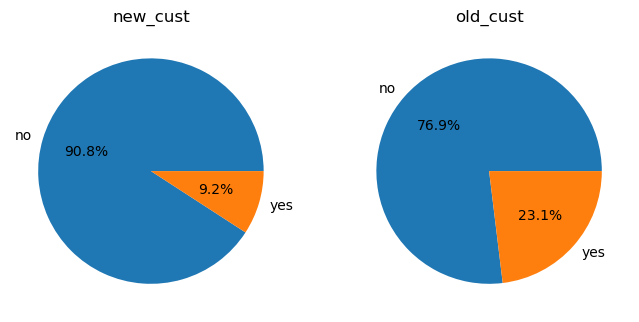

In [30]:
fig,ax=plt.subplots(1,df['new_contact'].nunique(),figsize=(8,6))
for i,col in enumerate(df['new_contact'].unique()):
    ax[i].pie(x=df[df['new_contact']==col]['y'].value_counts(),
              labels=df[df['new_contact']==col]['y'].value_counts().index,autopct='%1.1f%%')
    ax[i].set_title(col)

no of old customers who where contacted and responded are 23.1% , no. of old customers who responded are 9.2% .so maybe old customers shld be the target audience for the next campaigns

#### RELATIONSHIP OF RESPONSE WITH THE DURATION OF THE CALL 

In [31]:
#duration in minutes 
df['duration']= df['duration']/60

In [32]:
from sklearn.preprocessing import KBinsDiscretizer
disc_dur=KBinsDiscretizer(n_bins=5,strategy='quantile',encode='ordinal')
disc_dur.fit(df[['duration']])
df['duration_rank']=disc_dur.transform(df[['duration']])

In [33]:
disc_dur.bin_edges_

array([array([ 0.        ,  1.48333333,  2.45      ,  3.71666667,  6.13333333,
              81.96666667])                                                   ],
      dtype=object)

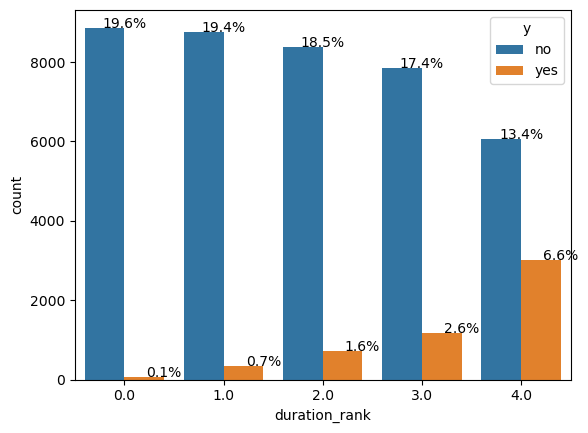

In [34]:
ax=sns.countplot(data=df,x='duration_rank',hue='y')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

In [35]:
def duration_of_call(time):
    if time<=1:
        return '<1min'
    elif time<=3:
        return '1-4min'
    elif time<=10:
        return '4-10min'
    else:
        return '>10min'
        

In [36]:
df['call_dur']=df['duration'].map(duration_of_call)

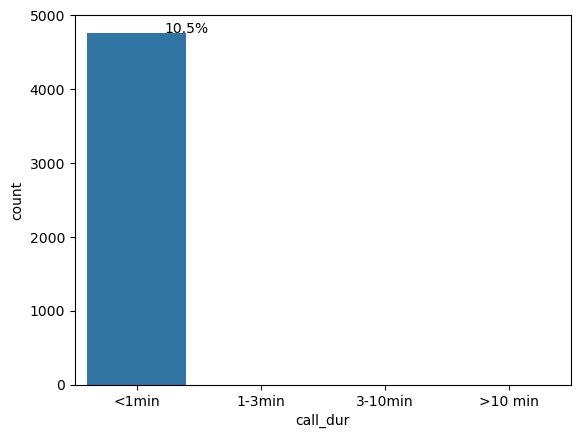

In [37]:
ax=sns.countplot(data=df,x='call_dur',order=['<1min','1-3min','3-10min','>10 min'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')


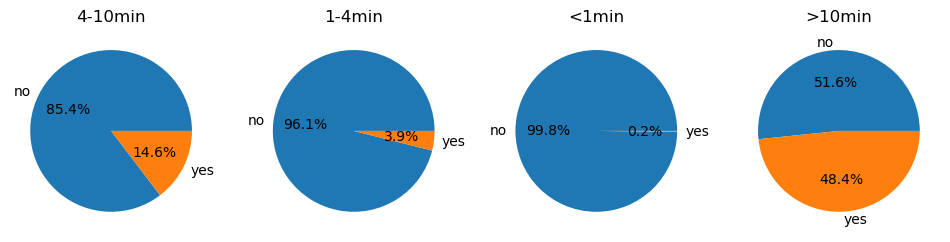

In [38]:
fig,ax=plt.subplots(1,df['call_dur'].nunique(),figsize=(12,10))
for i,col in enumerate(df['call_dur'].unique()):
    ax[i].pie(x=df[df['call_dur']==col]['y'].value_counts(),
              labels=df[df['call_dur']==col]['y'].value_counts().index,autopct='%1.1f%%')
    ax[i].set_title(col)

calls lasting for more than 4 -10 mins are subscribing to the term deposit

#### RELATIONSHIP OF RESPONSE WITH THE BALANCE

In [39]:
print(max(df['balance']))
print(sum(df['balance'])/len(df['balance']))
print(min(df['balance']))

102127
1362.2720576850766
-8019


In [40]:
list= [df]
for column in list:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'


In [41]:
# # Binning 'balance' column into categories
# bins = [-float('inf'), 0, 1000, 5000, float('inf')]
# labels = ['no balance', 'low balance', 'average balance', 'high balance']
# df['balance_group'] = pd.cut(df['balance'], bins=bins, labels=labels)

# # Calculate percentage of 'response' for each 'balance_group'
# count_balance_response_pct = pd.crosstab(df['y'], df['balance_group']).apply(lambda x: x / x.sum() * 100)
# count_balance_response_pct = count_balance_response_pct.transpose()

# # Calculate % Contacted
# bal = pd.DataFrame(df['balance_group'].value_counts())
# bal['% Contacted'] = bal['balance_group'] * 100 / bal['balance_group'].sum()

# # Combine the data
# bal['% Subscription'] = count_balance_response_pct['yes']
# bal = bal.sort_index(ascending=True)

# # Plot the data
# plot_balance = bal[['% Subscription', '% Contacted']].plot(kind='bar', color=('royalblue', 'skyblue'), figsize=(8, 6))

# plt.title('Subscription vs Contact Rate by Balance Level')
# plt.ylabel('Subscription Rate')
# plt.xlabel('Balance Category')
# plt.xticks(rotation='horizontal')

# # Label the bars
# for rec, label in zip(plot_balance.patches, bal['% Subscription'].round(1).astype(str)):
#     plot_balance.text(rec.get_x() + rec.get_width() / 2, rec.get_height() + 1, label + '%', ha='center', color='black')

# plt.show()






In [42]:
# df['balance'] = pd.to_numeric(df['balance'], errors='coerce')

#### Treating outliers in numeric features using winsorization

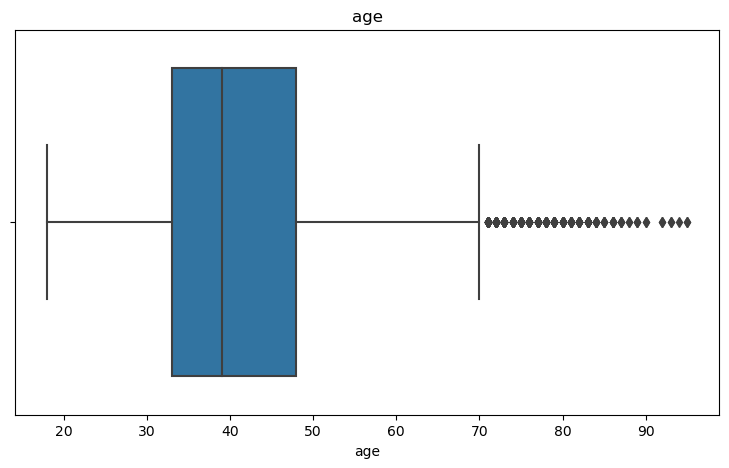

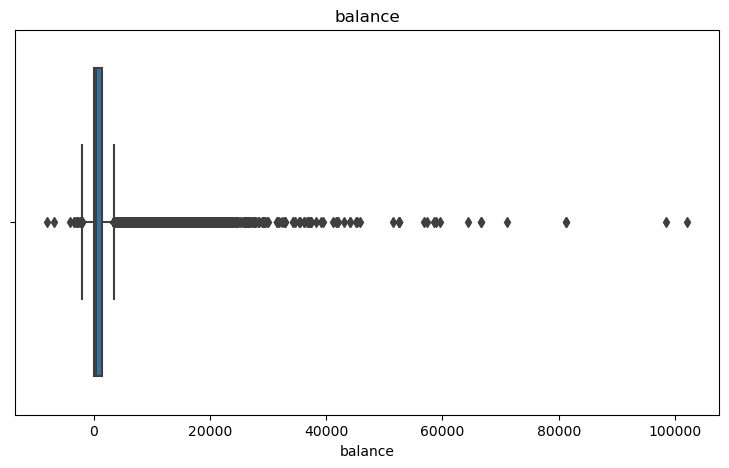

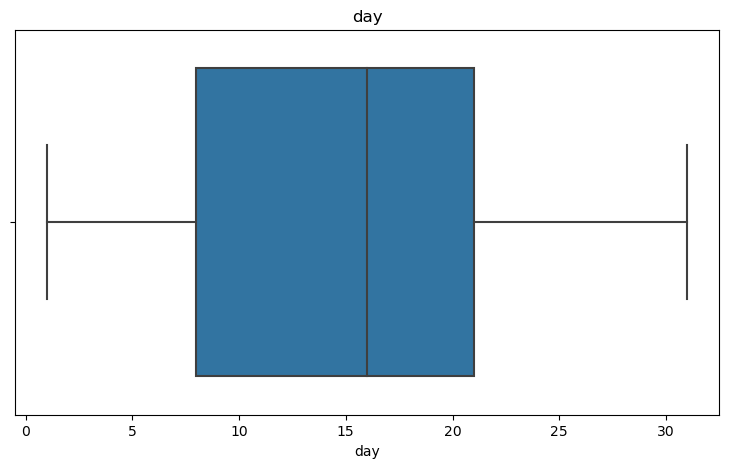

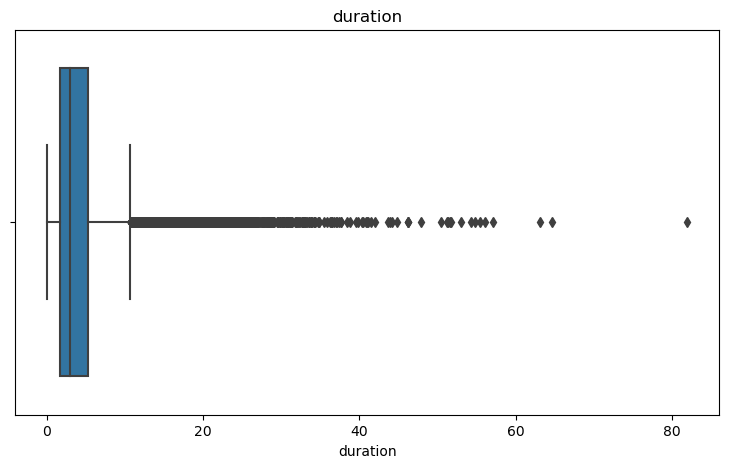

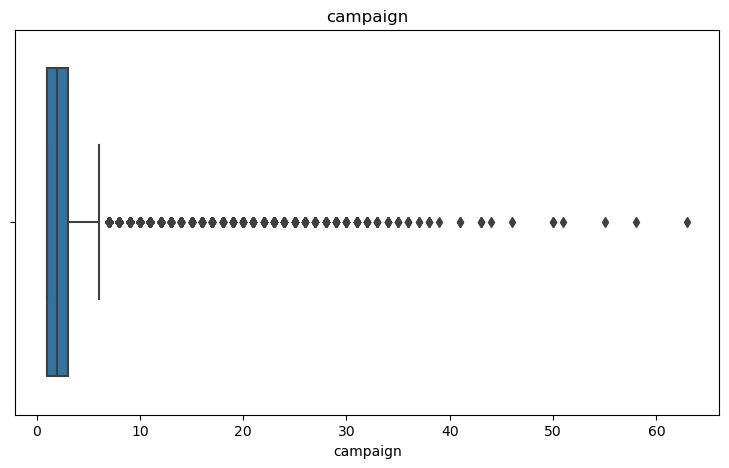

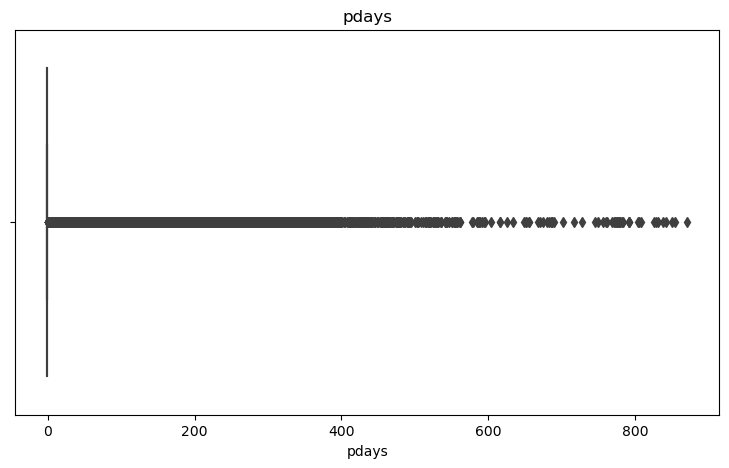

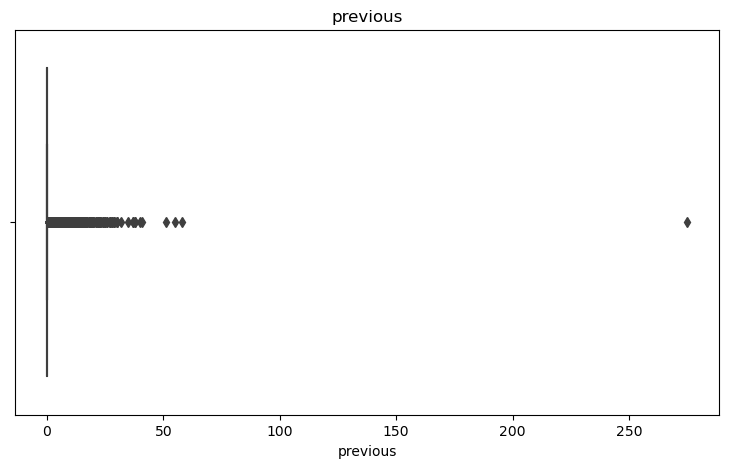

In [43]:
for column in numeric_col:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    sns.boxplot(df[column])
    plt.title(column)

Before applying the models we need to encode the categorical variables

In [44]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,age_group,new_contact,duration_rank,call_dur,balance_group
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,...,1,-1,0,unknown,no,senior,new_cust,3.0,4-10min,average balance
1,44,technician,single,secondary,no,29,yes,no,cellular,5,...,1,-1,0,unknown,no,middle,new_cust,2.0,1-4min,low balance
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,...,1,-1,0,unknown,no,middle,new_cust,0.0,1-4min,low balance
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,...,1,-1,0,unknown,no,middle,new_cust,1.0,1-4min,average balance
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,...,1,-1,0,unknown,no,middle,new_cust,2.0,4-10min,low balance


In [45]:
df.drop(columns=['age_group','new_contact','duration_rank','call_dur','balance_group'], axis=1, inplace=True)

In [46]:
#importing the necessary libraries 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


# Apply appropriate encoding to each column

categorical_col= ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome','month', 'default']
le = LabelEncoder()
# Iterating through each of the categorical columns and label encoding them
for feature in categorical_col:
    try:
        df[feature] = le.fit_transform(df[feature])
    except:
        print('Error encoding '+feature)



In [47]:
# 3. Map 'y' column to numeric values
df['y'] = df['y'].map({'no': 0, 'yes': 1})



Text(0.5, 1.0, 'after Outlier Capping')

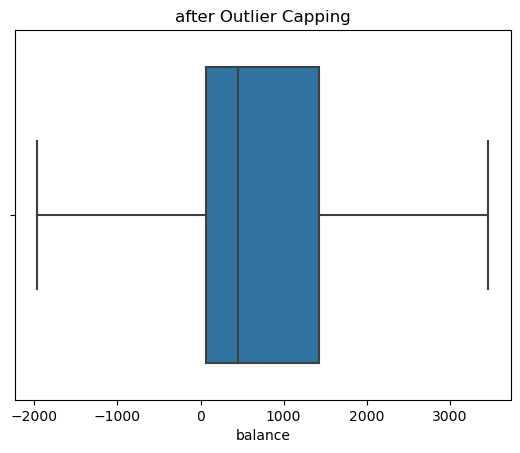

In [48]:
# TREATING OUTLIERS USING OUTLIER CAPPING
def outlier_capping(df,col):

        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        
        upper_whisker=q3 + 1.5 * iqr
        lower_whisker=q1- 1.5 * iqr
        
        df[col]=np.where(df[col]>upper_whisker,upper_whisker, #true action
                        np.where(df[col]<lower_whisker,lower_whisker,df[col]))
outlier_capping(df,'balance')
sns.boxplot(df['balance'])
plt.title('after Outlier Capping')

#### Fitting Machine Learning Models

In [49]:
# pip install xgboost 

In [50]:
#importing the necessary libraries 
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)

#### Preparing test and train data

In [51]:
# Features
X = df.iloc[:,:-1]

# Target
y = df.iloc[:,-1]

# Dividing the data into train and test subsets
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=10)


#### fitting the model and predicting the values

In [52]:
# run Logistic Regression model
model = LogisticRegression()
# fitting the model
model.fit(x_train, y_train)
# predicting the values
y_scores = model.predict(x_val)

#### Checking model performance

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7994
           1       0.53      0.19      0.28      1049

    accuracy                           0.89      9043
   macro avg       0.72      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043

ROC_AUC_SCORE is 0.5843206284599055


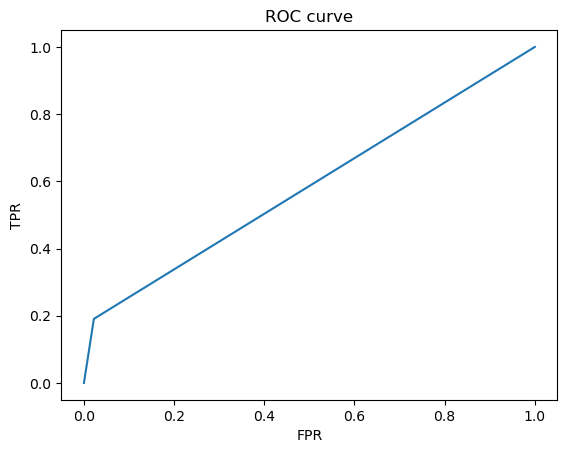

In [53]:
# getting the auc roc curve
auc = roc_auc_score(y_val, y_scores)
print('Classification Report:')
print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7994
           1       0.64      0.40      0.49      1049

    accuracy                           0.90      9043
   macro avg       0.78      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043

ROC_AUC_SCORE is 0.6853044931458366


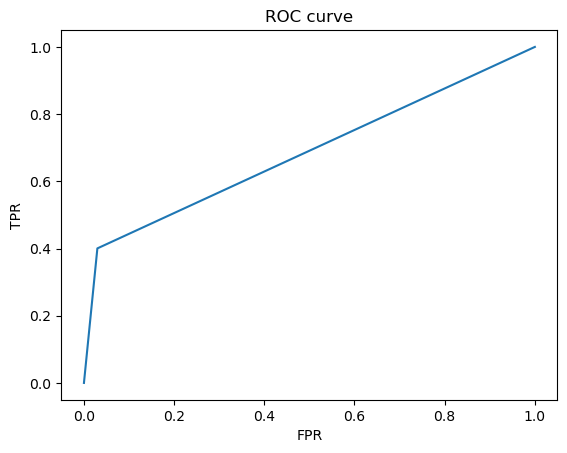

In [54]:
# run Random Forrest Classifier
model = RandomForestClassifier()

model.fit(x_train, y_train)
y_scores = model.predict(x_val)
auc = roc_auc_score(y_val, y_scores)
print('Classification Report:')
print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7994
           1       0.63      0.39      0.48      1049

    accuracy                           0.90      9043
   macro avg       0.78      0.68      0.71      9043
weighted avg       0.89      0.90      0.89      9043

ROC_AUC_SCORE is 0.6779909169245857


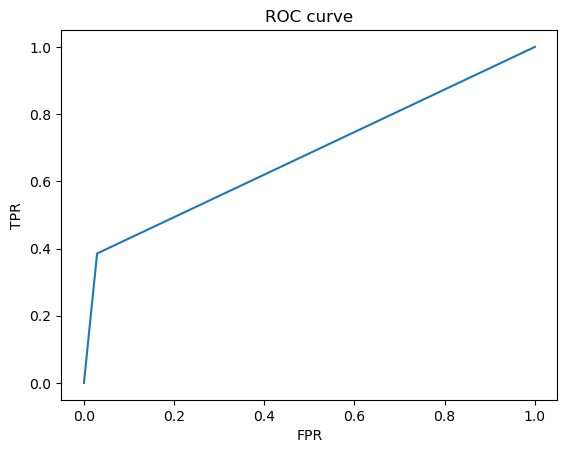

In [55]:
# Run Gradient Boosting model
model = GradientBoostingClassifier()

model.fit(x_train, y_train)
y_scores = model.predict(x_val)
auc = roc_auc_score(y_val, y_scores)
print('Classification Report:')
print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7994
           1       0.64      0.47      0.54      1049

    accuracy                           0.91      9043
   macro avg       0.78      0.72      0.75      9043
weighted avg       0.90      0.91      0.90      9043

ROC_AUC_SCORE is 0.7190664089582917


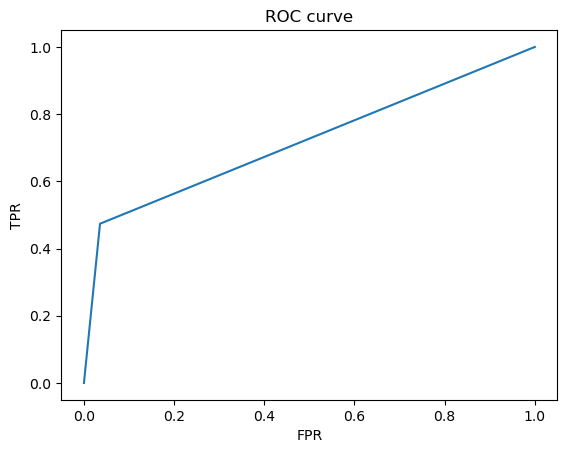

In [56]:
# Run XGBoost model
model = XGBClassifier()

model.fit(x_train, y_train)
y_scores = model.predict(x_val)
auc = roc_auc_score(y_val, y_scores)
print('Classification Report:')
print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have already defined your features (X) and target variable (y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but recommended for regularization-based methods)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Lasso regression model
lasso = Lasso(alpha=0.1)  # alpha is the regularization strength (you can adjust this parameter)

# Fit the Lasso model to the training data
lasso.fit(X_train_scaled, y_train)

# Predict the target variable on the test set
y_pred = lasso.predict(X_test_scaled)
# Get the coefficients and feature names
coefficients = lasso.coef_
feature_names = X.columns

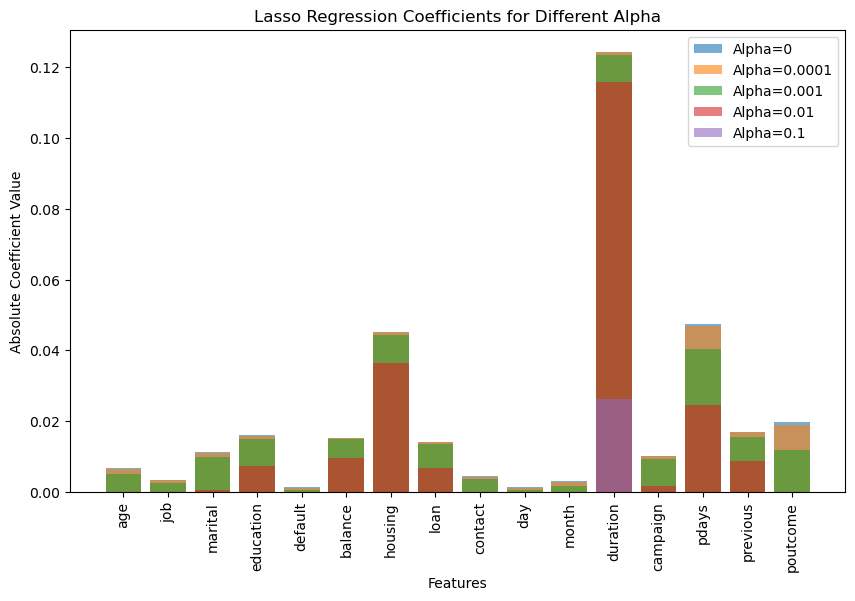

In [58]:
alphas = [0, 0.0001,0.001,0.01,0.1]  # Example values of alpha

plt.figure(figsize=(10, 6))
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    coefficients = lasso.coef_
    plt.bar(feature_names, np.abs(coefficients), alpha=0.6, label=f'Alpha={alpha}')

plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.title('Lasso Regression Coefficients for Different Alpha')
plt.xticks(rotation=90)
plt.legend()
plt.show()

#### RECURSIVE FEATURE ELIMINATION 

Features  to be selected for Logistic Regression model are:
['age', 'housing', 'loan', 'day', 'month', 'duration', 'pdays', 'poutcome']


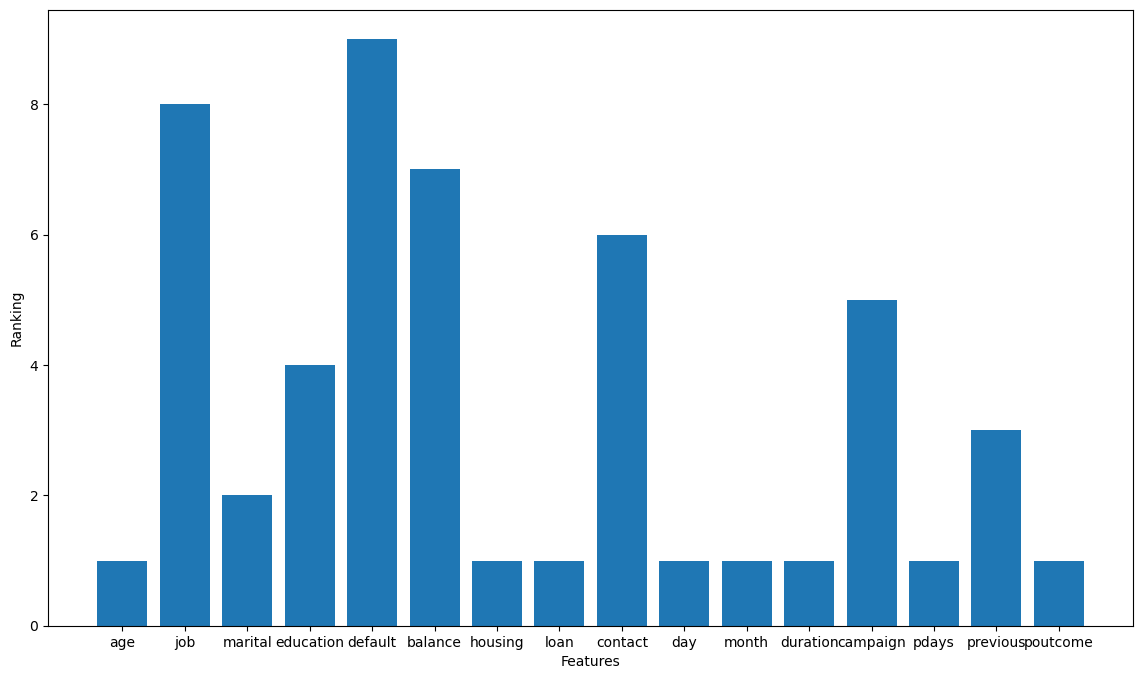

In [59]:
# Selecting 8 number of features
#   selecting models
models = LogisticRegression()
#   using  rfe and selecting 8 features
num_features_to_select = 8
rfe = RFE(model, n_features_to_select=num_features_to_select)
#   fitting the model
rfe = rfe.fit(X,y)
#   ranking features
feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
plt.show()
print('Features  to be selected for Logistic Regression model are:')
print(feature_ranking[feature_ranking.values==1].index.tolist())
plt.figure(figsize=(14, 8)) 
plt.bar(X.columns, rfe.ranking_)
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.show()


In [60]:
# Selecting 8 number of features
# Random Forrest classifier model
models = RandomForestClassifier()
#  using  rfe and selecting 8 features
num_features_to_select = 8
rfe = RFE(model, n_features_to_select=num_features_to_select)
#   fitting the model
rfe = rfe.fit(X,y)
#   ranking features
feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
plt.show()
print('Features  to be selected for Random Forrest Classifier are:')
print(feature_ranking[feature_ranking.values==1].index.tolist())


Features  to be selected for Random Forrest Classifier are:
['age', 'housing', 'loan', 'day', 'month', 'duration', 'pdays', 'poutcome']


In [61]:
# Selecting 8 number of features
# XGBoost classifier model
models = XGBClassifier()
#   using  rfe and selecting 8 features
num_features_to_select = 8
rfe = RFE(model, n_features_to_select=num_features_to_select)
#   fitting the model
rfe = rfe.fit(X,y)
#   ranking features
feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
plt.show()
print('Features  to be selected for XGBoost classifier are:')
print(feature_ranking[feature_ranking.values==1].index.tolist())


Features  to be selected for XGBoost classifier are:
['age', 'housing', 'loan', 'day', 'month', 'duration', 'pdays', 'poutcome']


#### FEATURE SELECTION USING RANDOM FOREST

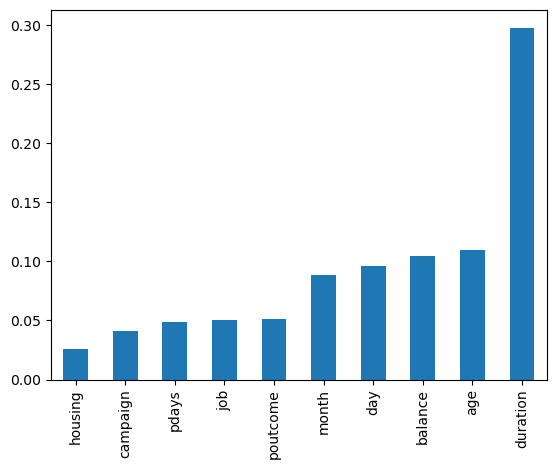

In [62]:
# splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# selecting the data
rfc = RandomForestClassifier(random_state=42)
# fitting the data
rfc.fit(X_train, y_train)
# predicting the data
y_pred = rfc.predict(X_test)
# feature importances
rfc_importances = pd.Series(rfc.feature_importances_, index=X.columns).sort_values().tail(10)
# plotting bar chart according to feature importance
rfc_importances.plot(kind='bar')
plt.show()

### Grid Search For Random Forest

In the below code we will performe hyperparameter tuning for random forest classifier to understand the best hyperaparameters suited for the model

In [63]:
# splitting the data
x_train,x_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
# selecting the classifier
rfc = RandomForestClassifier()
# selecting the parameter
param_grid = { 
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
             }
# using grid search with respective parameters
grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
# fitting the model
grid_search_model.fit(x_train, y_train)
# printing the best parameters
print('Best Parameters are:',grid_search_model.best_params_)

Best Parameters are: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}


Using Cross-Validation:
 to mitigate the computational cost of grid search is to use cross-validation. Instead of splitting the data into just a single training and validation set, cross-validation divides the data into multiple subsets or folds. The grid search then performs the tuning process on each fold, training and validating the model multiple times. This approach provides a more robust evaluation of the hyperparameters and reduces the risk of overfitting.

#### APPLYING GRIDSEARCH WITH SMOTE

Since the target is imbalanced, we apply Synthetic Minority Oversampling (SMOTE) for undersampling and oversampling the majority and minority classes in the target respectively.


#### 1. FOR RANDOM FOREST

              precision    recall  f1-score   support

           0       0.96      0.82      0.89     11977
           1       0.37      0.77      0.50      1587

    accuracy                           0.82     13564
   macro avg       0.67      0.80      0.69     13564
weighted avg       0.90      0.82      0.84     13564

[[9870 2107]
 [ 358 1229]]


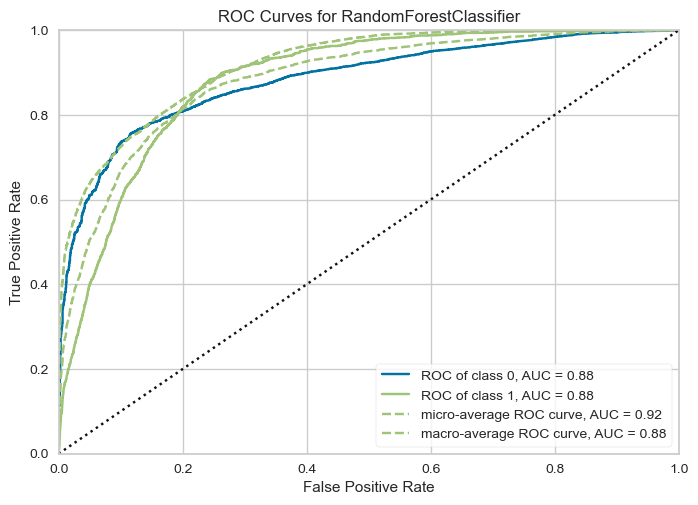

0    27956
1    27956
Name: y, dtype: int64


In [76]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import roc_auc


# A function to use smote
def grid_search_random_forest_best(dataframe,target):
    
    # splitting the data
    x_train,x_val,y_train,y_val = train_test_split(dataframe,target, test_size=0.3, random_state=42,stratify=y)
    
    # Applying Smote on train data for dealing with class imbalance
    smote = SMOTE(sampling_strategy='minority')
    
    X_sm, y_sm =  smote.fit_resample(x_train, y_train)
    
    rfc = RandomForestClassifier(n_estimators=11, max_features='auto', max_depth=8, criterion='entropy',random_state=42)
    
    rfc.fit(X_sm, y_sm)
    y_pred = rfc.predict(x_val)
    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))
    visualizer = roc_auc(rfc,X_sm,y_sm,x_val,y_val)


grid_search_random_forest_best(X,y)
print(y_sm.value_counts())


Classification Report Understanding-
- Precision of 0 , represents that for all the instances predicted as no subscription, the percentage of clients that actually 
said no were is 96%
- recall of 0 indicates for all clients that actually said no , the model predicts correctly by 84%
- precision of 1 , represents that for all instances predicted as yes subscription, the precentage of clients that said yes is 39%
- recall of 1 , represents that for all clients that actually said yes, the model predicts correctly by 76%

Here we can see that the samples for positive classes seem to be very less as compared to negative classes therefore the bad
precision and recall scores

#### Applying the grid search function for random forest only on the best features obtained using RFE

              precision    recall  f1-score   support

           0       0.97      0.81      0.88     11977
           1       0.37      0.82      0.51      1587

    accuracy                           0.81     13564
   macro avg       0.67      0.82      0.69     13564
weighted avg       0.90      0.81      0.84     13564

[[9722 2255]
 [ 288 1299]]


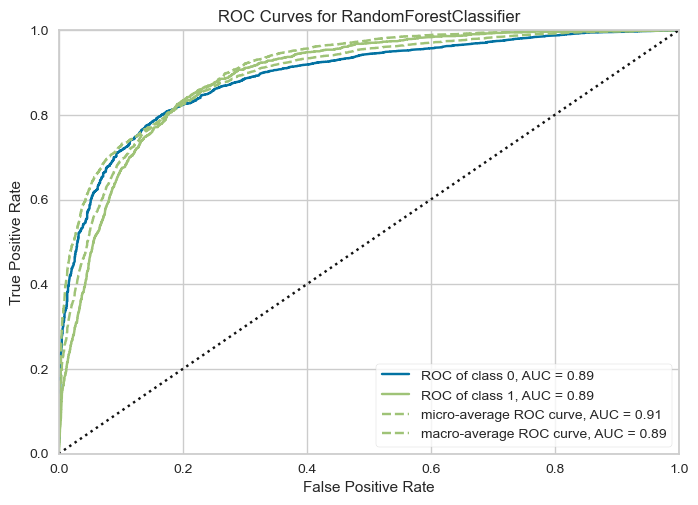

In [69]:
grid_search_random_forest_best(X[['housing', 'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'poutcome']],y)

#### 2. FOR LOGISTIC REGRESSION 

In [70]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the range of C values you want to test
c_values = np.logspace(-5, 8, 15)

# Create a Logistic Regression model
log_reg = LogisticRegression()

# Create a dictionary containing the hyperparameter(s) you want to tune
param_grid = {'C': c_values}

# Initialize GridSearchCV with the Logistic Regression model and the parameter grid
grid_search = GridSearchCV(log_reg, param_grid=param_grid, cv=5)  # cv=5 for 5-fold cross-validation

# Fit the GridSearchCV on the training data
grid_search.fit(x_train, y_train)

# Get the best C value found during the search
best_c = grid_search.best_params_['C']
print("Best C value:", best_c)

# Get the best model with the best C value
best_model = grid_search.best_estimator_

# Predict on the validation set using the best model
y_pred = best_model.predict(x_val)

# Evaluate the model's performance on the validation set
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

Best C value: 0.006105402296585327
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.57      0.16      0.25      1598

    accuracy                           0.89     13564
   macro avg       0.73      0.57      0.60     13564
weighted avg       0.86      0.89      0.86     13564

Confusion Matrix:
[[11768   198]
 [ 1337   261]]


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.88     11977
           1       0.33      0.66      0.44      1587

    accuracy                           0.81     13564
   macro avg       0.64      0.74      0.66     13564
weighted avg       0.88      0.81      0.83     13564

Confusion Matrix:
[[9893 2084]
 [ 541 1046]]


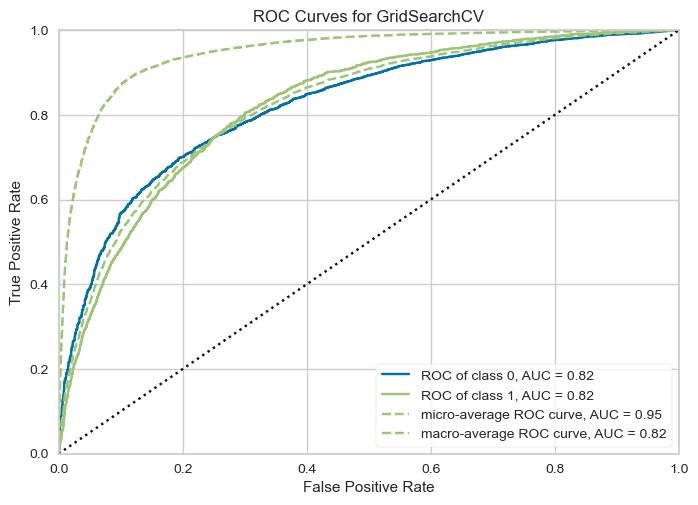

In [71]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

best_C = 0.4393970560760795
smote = SMOTE(sampling_strategy= 'minority')
X_sm, y_sm = smote.fit_resample(x_train, y_train)


log_reg = LogisticRegression(C=best_C, random_state=42)
log_reg.fit(X_sm, y_sm)


y_pred = log_reg.predict(x_val)


print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
visualizer = roc_auc(grid_search,X_sm,y_sm,x_val,y_val)


#### 3. FOR XGBOOST MODEL

              precision    recall  f1-score   support

           0       0.96      0.88      0.92     11966
           1       0.45      0.74      0.56      1598

    accuracy                           0.86     13564
   macro avg       0.71      0.81      0.74     13564
weighted avg       0.90      0.86      0.88     13564

[[10535  1431]
 [  421  1177]]


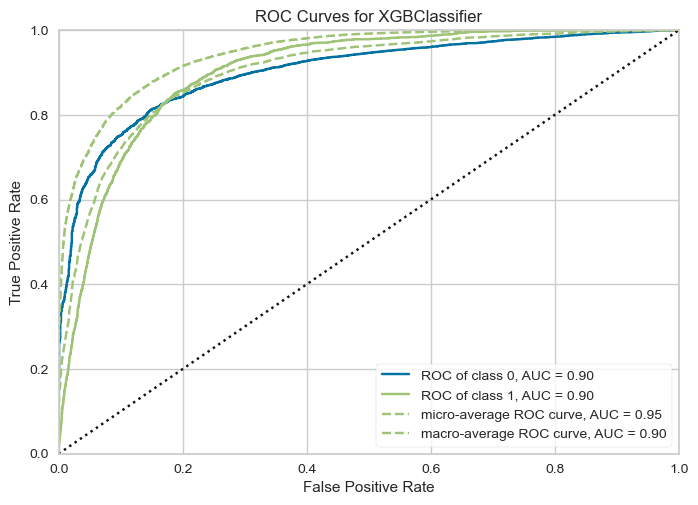

In [72]:
# spiltting the data into train and test data
x_train,x_val,y_train,y_val = train_test_split(X, y, test_size=0.3, random_state=42)
# initializing smote
smote = SMOTE(sampling_strategy= 'minority')
# applying smote
X_sm, y_sm =  smote.fit_resample(x_train, y_train)
# initializing XGBoost classifier
model = XGBClassifier(n_estimators=50, max_depth=4)
# fitting the model
model.fit(pd.DataFrame(X_sm,columns=x_train.columns), y_sm)
# predicting the model
y_pred = model.predict(x_val)

# printing classification report
print(classification_report(y_val, y_pred))
# printing confusion matrix
print(confusion_matrix(y_val, y_pred))
# using visualizer to 
visualizer = roc_auc(model,X_sm,y_sm,x_val,y_val)

### PREDICTION ON TEST DATA

In [ ]:
test= pd.read_csv("F://Banking Project//test (1).csv")
test
test.drop('Id', inplace=True, axis=1)
test.head()

In [ ]:
smote = SMOTE()

X_sm, y_sm =  smote.fit_resample(x_train, y_train)


log_reg = LogisticRegression()

param_grid = { 
            'C' : np.logspace(-5, 8, 15)
             }
grid_search = GridSearchCV(log_reg, param_grid=param_grid)

grid_search.fit(X_sm, y_sm)
    
# Predict on the preprocessed test file
y_pred = grid_search.predict(test)
# printing classification report
print(classification_report(y_test, y_tes))
# printing confusion matrix
print(confusion_matrix(y_val, y_pred))
# using visualizer to 
visualizer = roc_auc(model,X_sm,y_sm,x_val,y_val)
